Sheet 3 Exercise 1 c)

In [53]:
#imports
import pandas as pd
import json
import matplotlib.pyplot as plt

We need to compute mean, median of *likes*, *replies* and *retweets* from scraped twitter data:

In [54]:
with open("tweets.json") as f:
    tweets_raw = json.load(f)

tweets = pd.json_normalize(tweets_raw)


In [55]:
like_median = tweets["public_metrics.like_count"].median()
like_mean = tweets["public_metrics.like_count"].mean()
reply_median = tweets["public_metrics.reply_count"].median()
reply_mean = tweets["public_metrics.reply_count"].mean()
retweet_median = tweets["public_metrics.retweet_count"].median()
retweet_mean = tweets["public_metrics.retweet_count"].mean()
print(f"Median of likes: {like_median}")
print(f"Mean of likes: {like_mean}")
print(f"Median of replies: {reply_median}")
print(f"Mean of replies: {reply_mean}")
print(f"Median of retweets: {retweet_median}")
print(f"Mean of retweets: {retweet_mean}")


Median of likes: 0.0
Mean of likes: 0.5801136363636363
Median of replies: 0.0
Mean of replies: 0.0834090909090909
Median of retweets: 0.0
Mean of retweets: 58.028977272727275


We can see that the *retweets* are an outlier compared to the other two statistics, since the mean is 58.0289... Since the median is 0 like for the other stats, this implies that there must be some tweets which have many retweets in order to skew the mean.

/tmp/ipykernel_26420/2082966097.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


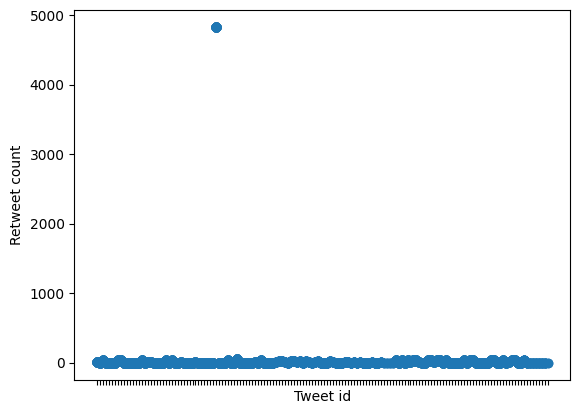

In [56]:
fig, ax = plt.subplots()
ax.scatter(tweets["id"],tweets["public_metrics.retweet_count"])
ax.set_xlabel("Tweet id")
ax.set_ylabel("Retweet count")
for label in ax.xaxis.get_ticklabels():
    label.set_visible(False) # hide id labels since they are not relevant
fig.show()

The plot above confirms this theory! We have a single tweet with almost 5000 retweets which skews our mean.